# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data

        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # temperature = weather_json["main"]["temp"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | ma'rib
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | yigo village
Processing Record 7 of Set 1 | zambezi
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | xining
Processing Record 10 of Set 1 | arkhangel'sk
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | queenstown
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | haapsalu
Processing Record 15 of Set 1 | beau vallon
Processing Record 16 of Set 1 | natal
Processing Record 17 of Set 1 | ilha solteira
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | utrik
Processing Record 22 of Set 1 | la passe
Processing Record 23 of Set 1 |

Processing Record 36 of Set 4 | kadinhani
Processing Record 37 of Set 4 | kuqa
Processing Record 38 of Set 4 | champerico
Processing Record 39 of Set 4 | espargos
City not found. Skipping...
Processing Record 40 of Set 4 | constantia
Processing Record 41 of Set 4 | arraial do cabo
Processing Record 42 of Set 4 | remire-montjoly
Processing Record 43 of Set 4 | sorong
Processing Record 44 of Set 4 | konarka
Processing Record 45 of Set 4 | tura
Processing Record 46 of Set 4 | nuuk
Processing Record 47 of Set 4 | colby
Processing Record 48 of Set 4 | graaff-reinet
Processing Record 49 of Set 4 | junin
Processing Record 0 of Set 5 | gisborne
Processing Record 1 of Set 5 | kokpekty
Processing Record 2 of Set 5 | mukalla
Processing Record 3 of Set 5 | nar'yan-mar
Processing Record 4 of Set 5 | la paz
Processing Record 5 of Set 5 | hermanus
Processing Record 6 of Set 5 | leesville
Processing Record 7 of Set 5 | pandan
Processing Record 8 of Set 5 | chonchi
Processing Record 9 of Set 5 | karrat

Processing Record 29 of Set 8 | tahoua
Processing Record 30 of Set 8 | ketchikan
Processing Record 31 of Set 8 | laguna
Processing Record 32 of Set 8 | igunga
Processing Record 33 of Set 8 | bria
Processing Record 34 of Set 8 | codrington
Processing Record 35 of Set 8 | saint-francois
Processing Record 36 of Set 8 | novodvinsk
Processing Record 37 of Set 8 | porto belo
Processing Record 38 of Set 8 | zinjibar
Processing Record 39 of Set 8 | pekanbaru
Processing Record 40 of Set 8 | sao gabriel da cachoeira
Processing Record 41 of Set 8 | bikenibeu village
Processing Record 42 of Set 8 | blenheim
Processing Record 43 of Set 8 | ikalamavony
Processing Record 44 of Set 8 | thunder bay
Processing Record 45 of Set 8 | zaltan
Processing Record 46 of Set 8 | port-vila
Processing Record 47 of Set 8 | bandar abbas
Processing Record 48 of Set 8 | nurota
Processing Record 49 of Set 8 | alice springs
Processing Record 0 of Set 9 | khash
Processing Record 1 of Set 9 | san luis de la loma
Processing

City not found. Skipping...
Processing Record 18 of Set 12 | greymouth
Processing Record 19 of Set 12 | forbesganj
Processing Record 20 of Set 12 | nkurenkuru
City not found. Skipping...
Processing Record 21 of Set 12 | brisas de zicatela
Processing Record 22 of Set 12 | nizhnyaya salda
Processing Record 23 of Set 12 | tucuma
Processing Record 24 of Set 12 | ayr
Processing Record 25 of Set 12 | susuman
Processing Record 26 of Set 12 | ouesso
Processing Record 27 of Set 12 | brezina
Processing Record 28 of Set 12 | naha
Processing Record 29 of Set 12 | port shepstone
Processing Record 30 of Set 12 | mata-utu
Processing Record 31 of Set 12 | fortuna
Processing Record 32 of Set 12 | aoulef
Processing Record 33 of Set 12 | port blair
Processing Record 34 of Set 12 | acarau
Processing Record 35 of Set 12 | ilabaya
Processing Record 36 of Set 12 | al ghayzah
Processing Record 37 of Set 12 | ujae
Processing Record 38 of Set 12 | san pedro pochutla
Processing Record 39 of Set 12 | okhotsk
Proc

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,3.06,70,20,8.23,CL,1699936125
1,puerto natales,-51.7236,-72.4875,0.85,83,81,4.47,CL,1699936138
2,ma'rib,15.4591,45.3253,21.09,41,43,2.27,YE,1699936138
3,avarua,-21.2078,-159.7750,23.03,64,40,3.09,CK,1699936120
4,qaqortoq,60.7167,-46.0333,-6.93,94,95,1.61,GL,1699935960


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,3.06,70,20,8.23,CL,1699936125
1,puerto natales,-51.7236,-72.4875,0.85,83,81,4.47,CL,1699936138
2,ma'rib,15.4591,45.3253,21.09,41,43,2.27,YE,1699936138
3,avarua,-21.2078,-159.7750,23.03,64,40,3.09,CK,1699936120
4,qaqortoq,60.7167,-46.0333,-6.93,94,95,1.61,GL,1699935960


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

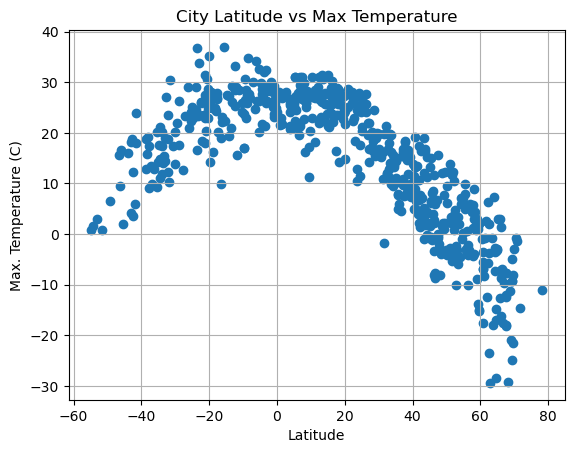

In [103]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max. Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

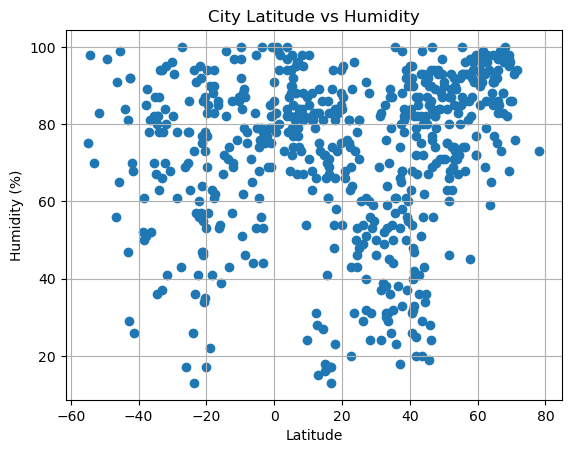

In [121]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

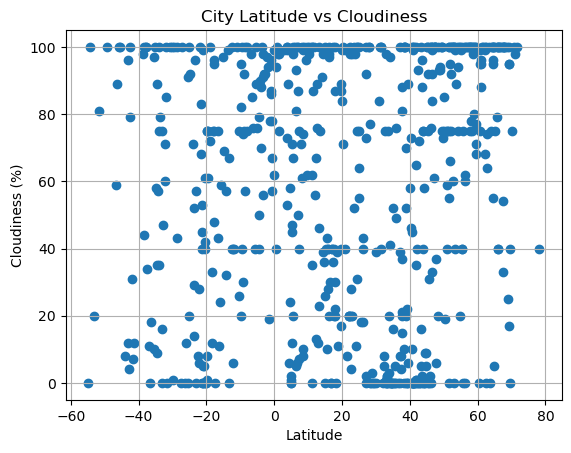

In [105]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

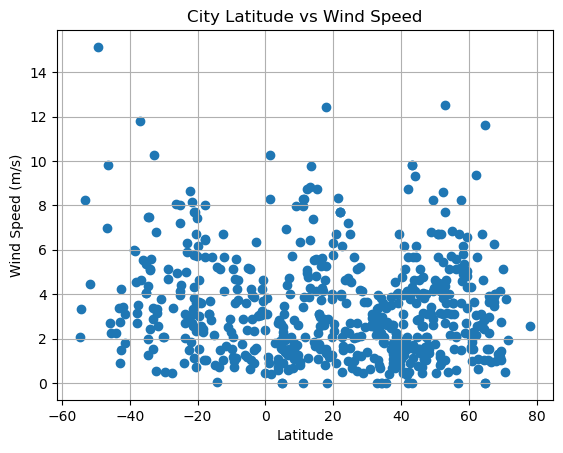

In [106]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [107]:
# Define a function to create Linear Regression plots
def LRPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    plt.savefig(f"output_data/{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

In [108]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ma'rib,15.4591,45.3253,21.09,41,43,2.27,YE,1699936138
4,qaqortoq,60.7167,-46.0333,-6.93,94,95,1.61,GL,1699935960
5,yigo village,13.5361,144.8886,30.62,73,75,9.77,GU,1699936139
8,xining,36.6167,101.7667,4.48,38,0,0.41,CN,1699935923
9,arkhangel'sk,64.5401,40.5433,-3.26,91,95,2.84,RU,1699935923


In [109]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,3.06,70,20,8.23,CL,1699936125
1,puerto natales,-51.7236,-72.4875,0.85,83,81,4.47,CL,1699936138
3,avarua,-21.2078,-159.7750,23.03,64,40,3.09,CK,1699936120
6,zambezi,-13.5432,23.1047,20.98,71,99,0.72,ZM,1699935922
7,grytviken,-54.2811,-36.5092,1.66,98,100,3.31,GS,1699935922


###  Temperature vs. Latitude Linear Regression Plot

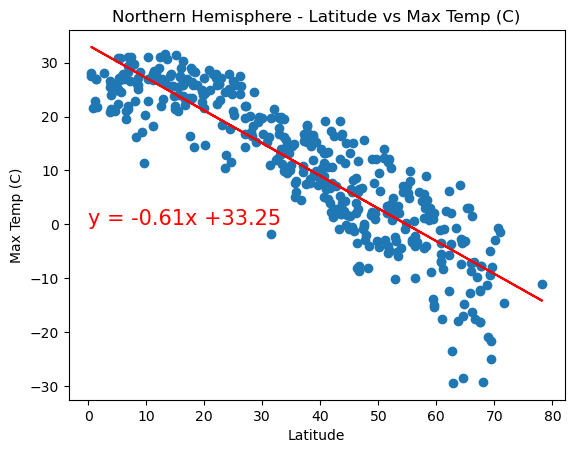

In [110]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
LRPlot(x_values, y_values, "Latitude", "Max Temp (C)", "Northern",(0, 0))

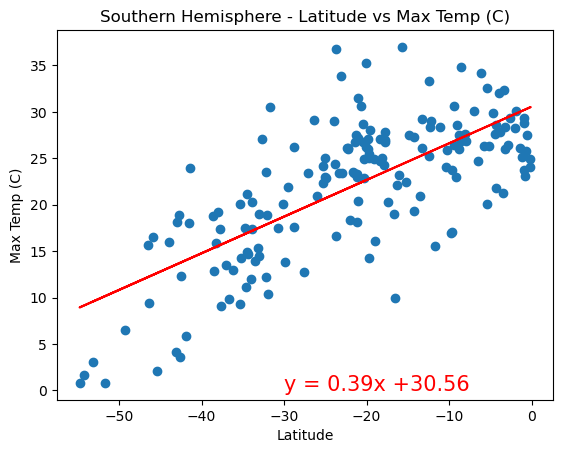

In [111]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
LRPlot(x_values, y_values, "Latitude", "Max Temp (C)", "Southern",(-30, 0))

**Discussion about the linear relationship:**
As expected, both the data comparing Latitude against Max Temperature shows a correlation of temperature steadily increasing as one approaches the equator.

### Humidity vs. Latitude Linear Regression Plot

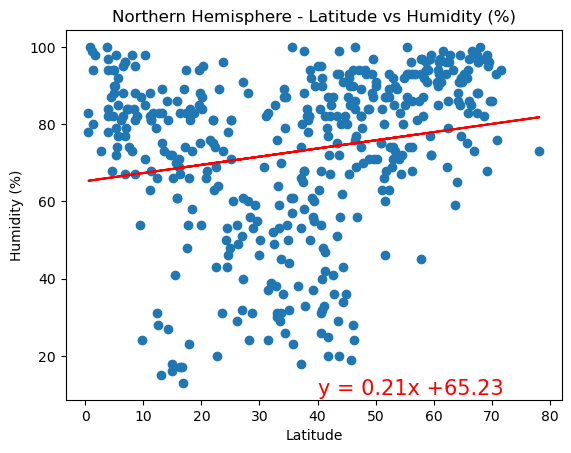

In [112]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
LRPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 10))

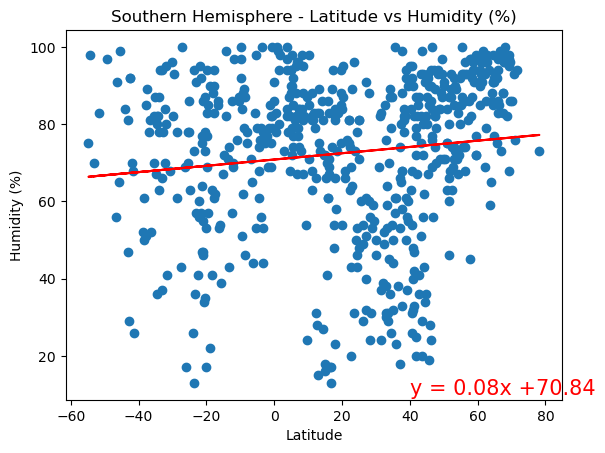

In [122]:
# Southern Hemisphere
x_values1 = southern_hemi_df["Lat"]
y_values1 = southern_hemi_df["Humidity"]
LRPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 10))

**Discussion about the linear relationship:**
The data shows a relatively weak correlation between Latitude and Humidity. Overall, it appears as there is a dip in humidity levels about 20-40 degrees away from the equator, with higher concentrations closer to the equator and poles.

### Cloudiness vs. Latitude Linear Regression Plot

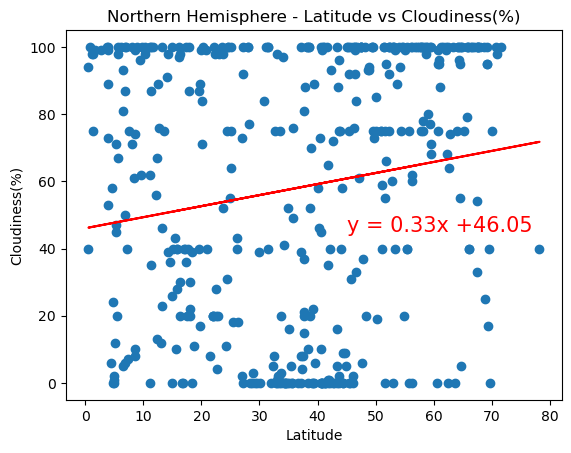

In [115]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
LRPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(45, 45))

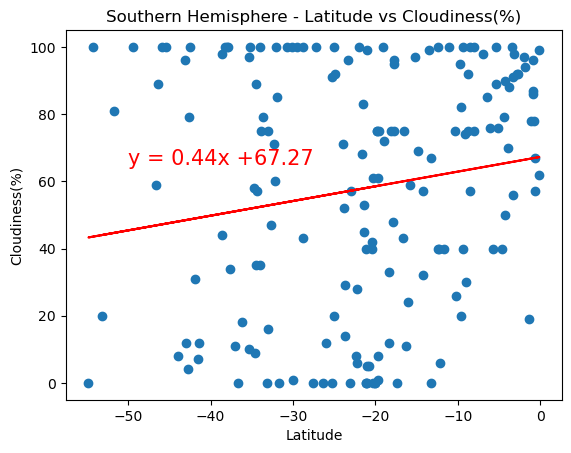

In [116]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
LRPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-50, 65))

**Discussion about the linear relationship:**
Similar to Humidity, Cloudiness seems to have a weak correlation to Latitude. An interesting note is that Cloudiness trends towards an all-or-nothing scenario, clustering strongly at both 0 and 100%.

### Wind Speed vs. Latitude Linear Regression Plot

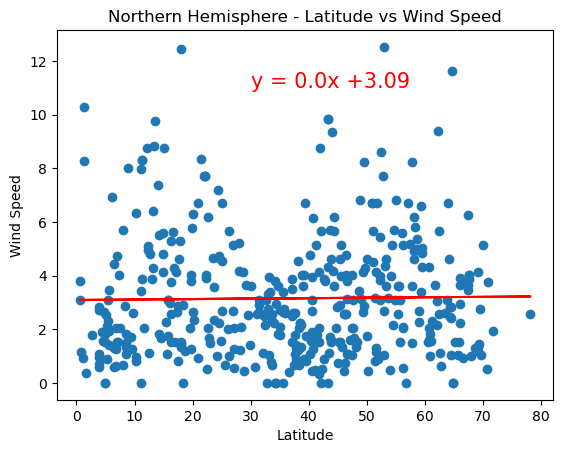

In [117]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
LRPlot(x_values, y_values, "Latitude", "Wind Speed", "Northern",(30, 11))

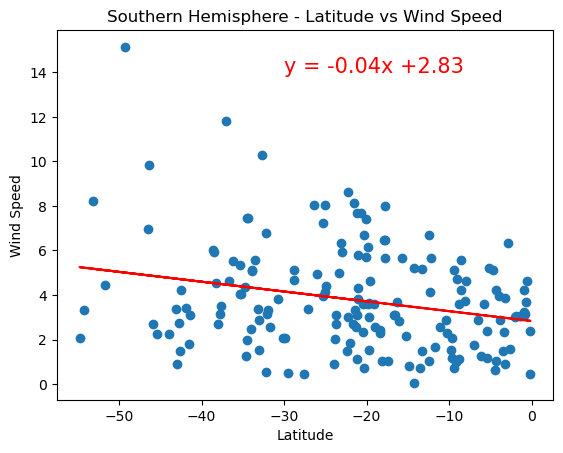

In [118]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
LRPlot(x_values, y_values, "Latitude", "Wind Speed", "Southern",(-30, 14))

**Discussion about the linear relationship:**
Wind Speed has a weak correlation with Latitude, appearing almost unrelated until you close to the South Pole. This may have less to do with Latitude directly and more to do with more open oceans in the Southern Hemisphere.